In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, asin, sqrt, radians
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
customers_data = pd.read_csv("olist_customers_dataset.csv")
geolocation_data = pd.read_csv("olist_geolocation_dataset.csv")
items_data = pd.read_csv("olist_order_items_dataset.csv")
payments_data = pd.read_csv("olist_order_payments_dataset.csv")
reviews_data = pd.read_csv("olist_order_reviews_dataset.csv")
orders_data = pd.read_csv("olist_orders_dataset.csv")
products_data = pd.read_csv("olist_products_dataset.csv")
sellers_data = pd.read_csv("olist_sellers_dataset.csv")
category_data = pd.read_csv("product_category_name_translation.csv")

#
# Partie Exploration

##
## Customers Data

In [3]:
customers_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [6]:
customers_data_1 = customers_data.drop(['customer_city', 'customer_state'], axis = 1)
customers_data_1

,customer_id,customer_unique_id,customer_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120


##
## Geolocation Data

In [7]:
geolocation_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [8]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
geolocation_data.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [10]:
geolocation_data_1 = geolocation_data.drop(['geolocation_city','geolocation_state'], axis = 1)
geolocation_data_1

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951
3,1041,-23.544392,-46.639499
4,1035,-23.541578,-46.641607
...,...,...,...
1000158,99950,-28.068639,-52.010705
1000159,99900,-27.877125,-52.224882
1000160,99950,-28.071855,-52.014716
1000161,99980,-28.388932,-51.846871


In [11]:
geolocation_data_2 = geolocation_data_1.groupby("geolocation_zip_code_prefix").mean()
geolocation_data_2 = geolocation_data_2.reset_index()
geolocation_data_2

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [12]:
# Merge de customers_data_1 et geolocation_data_2

customer_geo_data = customers_data_1.merge(geolocation_data_2, how = 'left', left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
customer_geo_data


,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,14409.0,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,9790.0,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,1151.0,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,8775.0,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,13056.0,-22.975100,-47.142925
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,3937.0,-23.586003,-46.499638
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,6764.0,-23.615830,-46.768533
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,60115.0,-3.734569,-38.510534
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,92120.0,-29.949839,-51.168494


In [13]:
customer_geo_data = customer_geo_data.drop(['customer_zip_code_prefix', 'geolocation_zip_code_prefix'], axis = 1)
customer_geo_data

,customer_id,customer_unique_id,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,-22.975100,-47.142925
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,-23.586003,-46.499638
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,-23.615830,-46.768533
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,-3.734569,-38.510534
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,-29.949839,-51.168494


In [14]:
customer_geo_data.rename(columns={"geolocation_lat":'customer_geo_lat', "geolocation_lng": 'customer_geo_lng'}, inplace = True)
customer_geo_data

,customer_id,customer_unique_id,customer_geo_lat,customer_geo_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,-22.975100,-47.142925
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,-23.586003,-46.499638
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,-23.615830,-46.768533
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,-3.734569,-38.510534
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,-29.949839,-51.168494


##
## Orders Data


In [15]:
orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [16]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
orders_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,1d7d027760d0ee20d6f3985f1fe22773,e98b6caaa9a23d78a283f65cec39e73f,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [18]:
orders_data['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [19]:
orders_data_1 = orders_data.drop(['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date'], axis = 1)
orders_data_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [20]:
orders_data_2 = orders_data_1[orders_data_1["order_status"]=='delivered']
orders_data_2.drop(['order_status'], axis = 1)

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54


In [21]:
orders_data_2["order_purchase_timestamp"] = pd.to_datetime(orders_data_2["order_purchase_timestamp"],format='%Y-%m-%d %H:%M:%S')

# 0 Monday, 1 Tuesday ...
orders_data_2['order_purchase_day'] = orders_data_2["order_purchase_timestamp"].dt.weekday

orders_data_2['order_purchase_month'] = orders_data_2["order_purchase_timestamp"].dt.month

orders_data_2['order_purchase_date'] = orders_data_2["order_purchase_timestamp"].dt.date

# 0 Night, 1 Morning, 2 Afternoon, 3 Evening
orders_data_2['order_purchase_periodDay'] = orders_data_2["order_purchase_timestamp"].apply(lambda x : 3 if 18 <= x.hour < 22
else (2 if 12 <= x.hour < 18
      else (1 if 7 <= x.hour < 12
            else 0)))

<ipython-input-21-54432a40e301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_data_2["order_purchase_timestamp"] = pd.to_datetime(orders_data_2["order_purchase_timestamp"],format='%Y-%m-%d %H:%M:%S')
<ipython-input-21-54432a40e301>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_data_2['order_purchase_day'] = orders_data_2["order_purchase_timestamp"].dt.weekday
<ipython-input-21-54432a40e301>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [22]:
orders_data_2 = orders_data_2.merge(customer_geo_data,how = 'left',on = 'customer_id')
orders_data_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,order_purchase_month,order_purchase_date,order_purchase_periodDay,customer_unique_id,customer_geo_lat,customer_geo_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,0,10,2017-10-02,1,7c396fd4830fd04220f754e42b4e5bff,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,7,2018-07-24,3,af07308b275d755c9edb36a90c618231,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2,8,2018-08-08,1,3a653a41f6f9fc3d2a113cf8398680e8,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,5,11,2017-11-18,3,7c142cf63193a1473d2e66489a9ae977,-5.774190,-35.271143
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,2,2018-02-13,3,72632f0f9dd73dfee390c9b22eb56dd6,-23.676370,-46.514627
...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,3,3,2017-03-09,1,6359f309b166b0196dbf7ad2ac62bb5a,-23.178000,-45.883818
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,2,2018-02-06,2,da62f9e57a76d978d02ab5362c509660,-24.001500,-46.449864
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,6,8,2017-08-27,2,737520a9aad80b3fbbdad19b66b37b30,-17.898358,-39.373630
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,0,1,2018-01-08,3,5097a5312c8b157bb7be58ae360ef43c,-22.562825,-42.694574


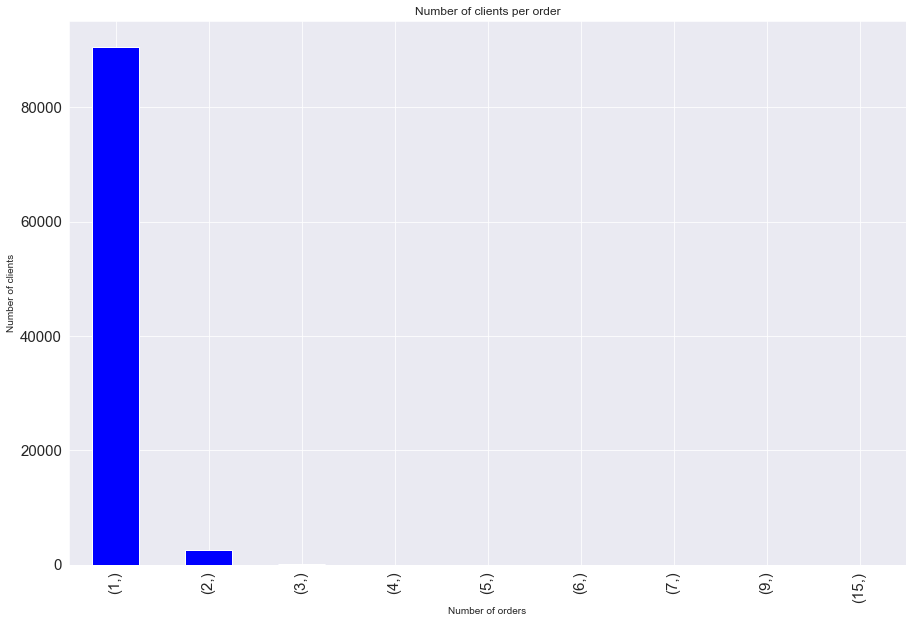

In [110]:
order_per_client_data = orders_data_2.groupby("customer_unique_id").agg(
      {"order_id" : 'count'})


order_per_client_data.value_counts().plot(figsize = (15,10), kind = "bar",
                             title = "Number of clients per order",
                                    fontsize=15,
                                    color="b",
                             ylabel = "Number of clients",
                             xlabel = "Number of orders",
                             legend = False)

plt.show()

In [24]:
orders_evolution = orders_data_2.groupby("order_purchase_date").count()
orders_evolution = orders_evolution['order_id']
orders_evolution

order_purchase_date
2016-09-15     1
2016-10-03     7
2016-10-04    54
2016-10-05    35
2016-10-06    41
              ..
2018-08-25    69
2018-08-26    73
2018-08-27    66
2018-08-28    39
2018-08-29    11
Name: order_id, Length: 612, dtype: int64

<AxesSubplot:title={'center':'Orders evolution'}, xlabel='Date', ylabel='Number of orders'>

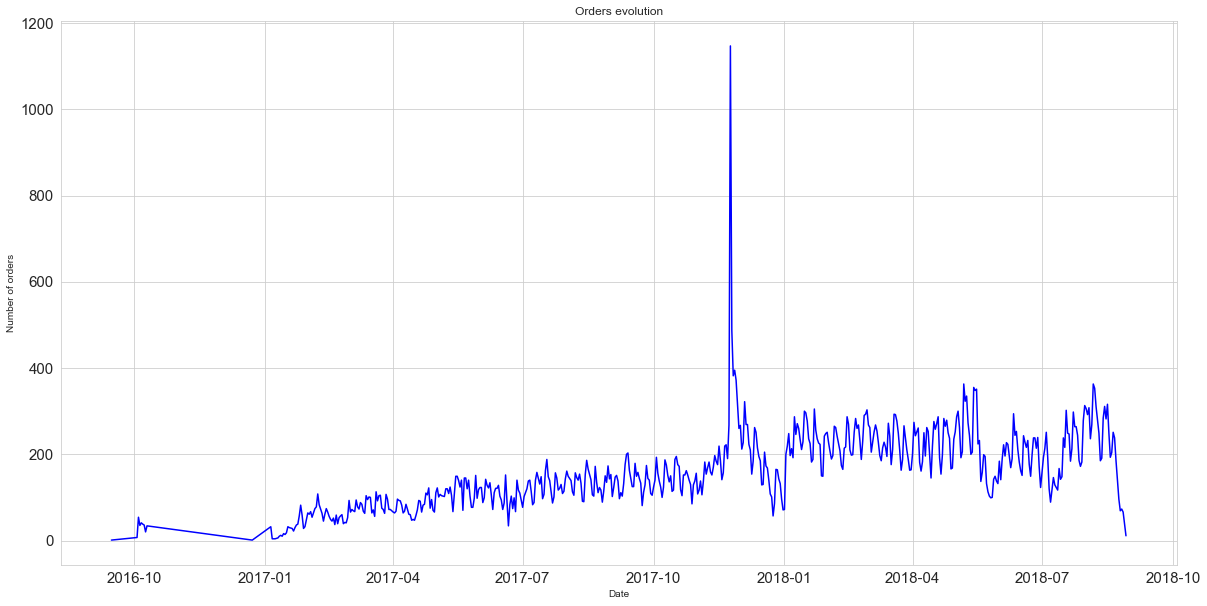

In [111]:
fig = plt.figure(figsize = (20, 10))
orders_evolution.plot(figsize = (20,10),
              title = "Orders evolution",
                      fontsize=15,
                      color="b",
              ylabel = "Number of orders",
              xlabel = "Date",
              legend = False)

In [26]:
order_purchase_per_day = orders_data_2.groupby("order_purchase_day").count()
order_purchase_per_day = order_purchase_per_day["order_id"]
order_purchase_per_day

order_purchase_day
0    15701
1    15503
2    15076
3    14323
4    13685
5    10555
6    11635
Name: order_id, dtype: int64

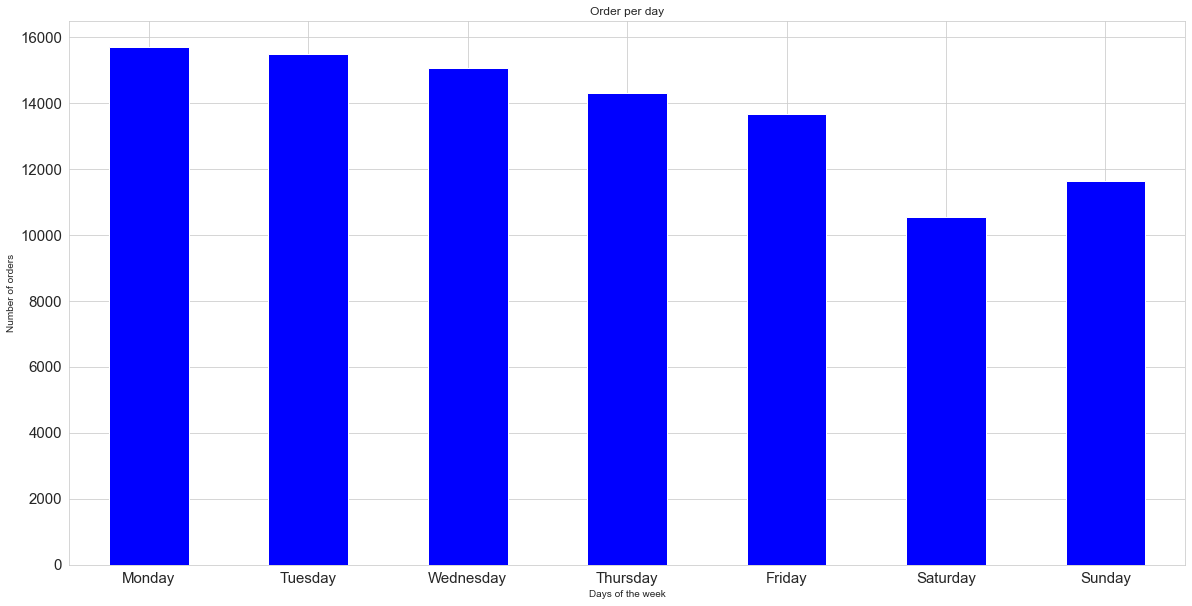

In [112]:

order_purchase_per_day.plot(figsize = (20,10), kind = "bar",
              title = "Order per day",
                        fontsize=15,
                        color="b",
              ylabel = "Number of orders",
              xlabel = "Days of the week",
              legend = False)
plt.xticks(np.arange(0,7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 'horizontal')
plt.show()

In [28]:
order_purchase_per_months = orders_data_2.groupby("order_purchase_month").count()
order_purchase_per_months = order_purchase_per_months["order_id"]

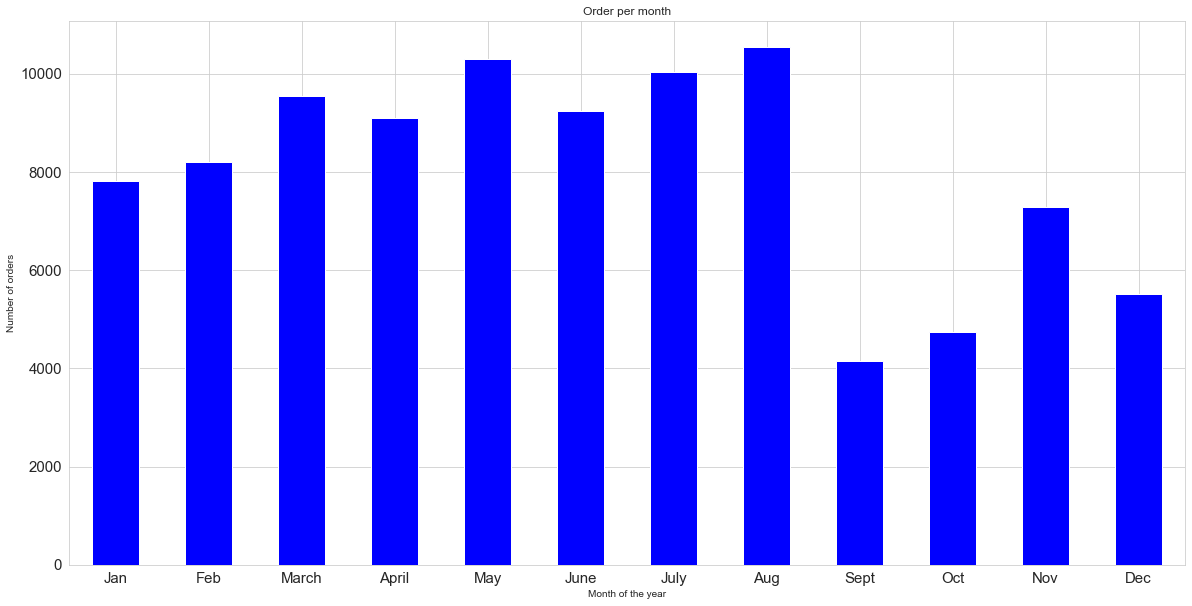

In [113]:

order_purchase_per_months.plot(figsize = (20,10), kind = "bar",
              title = "Order per month",
                        fontsize=15,
                        color="b",
              ylabel = "Number of orders",
              xlabel = "Month of the year",
              legend = False)
plt.xticks(np.arange(0,12), ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], rotation = 'horizontal')
plt.show()

In [30]:
order_purchase_by_periodDay = orders_data_2.groupby("order_purchase_periodDay").count()
order_purchase_by_periodDay = order_purchase_by_periodDay["order_id"]
order_purchase_by_periodDay

order_purchase_periodDay
0    14746
1    21116
2    37183
3    23433
Name: order_id, dtype: int64

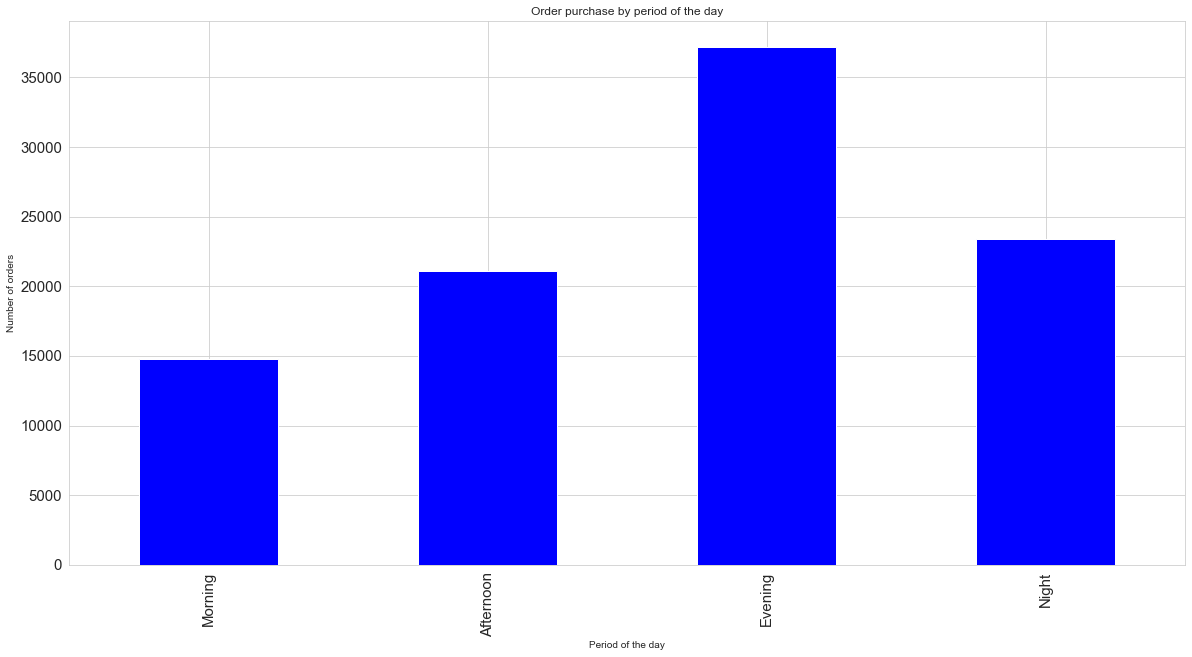

In [114]:

order_purchase_by_periodDay.plot(figsize = (20, 10), kind = "bar",
              title = "Order purchase by period of the day",
                        fontsize=15,
                        color="b",
              ylabel = "Number of orders",
              xlabel = "Period of the day",
              legend = False)

plt.xticks(np.arange(0, 4), ['Morning', 'Afternoon', 'Evening', 'Night'], rotation = 'vertical')
plt.show()

##
## Products Data

In [32]:
products_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [33]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
products_data_1 = products_data.drop(['product_name_lenght','product_description_lenght','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis = 1)
products_data_1

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0


In [35]:
# Merge with category

category_products = products_data_1.merge(category_data, how = 'left', on = 'product_category_name')
category_products = category_products.drop('product_category_name', axis = 1)
category_products

,product_id,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,art
2,96bd76ec8810374ed1b65e291975717f,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,4.0,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,2.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,1.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,1.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,2.0,computers_accessories


In [36]:
category_data

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [37]:
mapping_category_types = {
    'fashion_bags_accessories':'Clothing',
    'fashion_shoes':'Clothing',
    'fashion_male_clothing':'Clothing',
    'fashion_childrens_clothes':'Clothing',
    'fashio_female_clothing':'Clothing',
    'fashion_sport':'Clothing',
    'fashion_underwear_beach':'Clothing',
    'luggage_accessories':'Clothing',

    'bed_bath_table':'House',
    'furniture_decor':'House',
    'housewares':'House',
    'garden_tools':'House',
    'construction_tools_construction':'House',
    'construction_tools_safety':'House',
    'home_appliances':'House',
    'small_appliances':'House',
    'home_construction':'House',
    'furniture_living_room':'House',
    'home_confort':'House',
    'home_appliances_2':'House',
    'kitchen_dining_laundry_garden_furniture':'House',
    'home_comfort_2':'House',
    'furniture_mattress_and_upholstery':'House',
    'la_cuisine':'House',
    'furniture_bedroom':'House',
    'costruction_tools_tools':'House',
    'small_appliances_home_oven_and_coffee':'House',
    'costruction_tools_garden':'House',
    'construction_tools_lights':'House',

    'sports_leisure':'Leisure',
    'musical_instruments':'Leisure',
    'books_general_interest':'Leisure',
    'books_technical':'Leisure',
    'cds_dvds_musicals':'Leisure',
    'books_imported':'Leisure',
    'arts_and_craftmanship':'Leisure',
    'audio':'Leisure',
    'art':'Leisure',
    'musical_instruments':'Leisure',
    'dvds_blu_ray':'Leisure',
    'cine_photo':'Leisure',
    'music':'Leisure',
    'furniture_mattress_and_upholstery':'Leisure',

    'health_beauty':'Health_Beauty',
    'perfumery':'Health_Beauty',

    'auto':'Auto',

    'computers_accessories':'Technologies',
    'telephony':'Technologies',
    'electronics':'Technologies',
    'consoles_games':'Technologies',
    'small_appliances':'Technologies',
    'air_conditioning':'Technologies',
    'fixed_telephony':'Technologies',
    'computers':'Technologies',
    'tablets_printing_image':'Technologies',

    'toys':'Kids',
    'baby':'Kids',
    'diapers_and_hygiene':'Kids',

    'watches_gifts':'Other',
    'stationery':'Other',
    'cool_stuff':'Other',
    'luggage_accessories':'Other',
    'office_furniture':'Other',
    'signaling_and_security':'Other',
    'security_and_services':'Other',
    'flowers':'Other',
    'stationery':'Other',
    'market_place':'Other',
    'agro_industry_and_commerce':'Other',
    'industry_commerce_and_business':'Other',
    'christmas_supplies':'Other',
    'party_supplies':'Other',

    'food_drink':'Foods',
    'food':'Foods',
    'drinks':'Foods',

    'pet_shop':'Pets'}

In [38]:
def detect_words(categories, dictionary):
    list = []
    for tag in categories:
        if not tag:
            list.append(None)
        else:
            find = False
            for word, val in dictionary.items():
                if word == tag:
                    list.append(val)
                    find = True
            if not find:
                list.append(None)
    return list


In [39]:
category_products["product_category_name_english"] = detect_words(category_products["product_category_name_english"], mapping_category_types)

In [40]:
category_products['product_category_name_english'] = category_products['product_category_name_english'].fillna('Unknown')

In [41]:
category_products

,product_id,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,1.0,Health_Beauty
1,3aa071139cb16b67ca9e5dea641aaa2f,1.0,Leisure
2,96bd76ec8810374ed1b65e291975717f,1.0,Leisure
3,cef67bcfe19066a932b7673e239eb23d,1.0,Kids
4,9dc1a7de274444849c219cff195d0b71,4.0,House
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,2.0,House
32947,bf4538d88321d0fd4412a93c974510e6,1.0,House
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,1.0,House
32949,83808703fc0706a22e264b9d75f04a2e,2.0,Technologies


##
## Items Data

In [42]:
items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [43]:
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [44]:
items_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [45]:
items_category_products_data = items_data.merge(category_products, how = 'left', on = 'product_id')
items_category_products_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,4.0,Other
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2.0,Pets
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2.0,House
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,Health_Beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,House
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,3.0,House
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,Technologies
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,Leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,Technologies


In [46]:
orders_item_data = orders_data_2.merge(items_category_products_data, how = 'left', on = 'order_id')
orders_item_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,order_purchase_month,order_purchase_date,order_purchase_periodDay,customer_unique_id,customer_geo_lat,customer_geo_lng,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_photos_qty,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,0,10,2017-10-02,1,7c396fd4830fd04220f754e42b4e5bff,-23.576983,-46.587161,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4.0,House
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,7,2018-07-24,3,af07308b275d755c9edb36a90c618231,-12.177924,-44.660711,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,Health_Beauty
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2,8,2018-08-08,1,3a653a41f6f9fc3d2a113cf8398680e8,-16.745150,-48.514783,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,Auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,5,11,2017-11-18,3,7c142cf63193a1473d2e66489a9ae977,-5.774190,-35.271143,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,3.0,Pets
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,2,2018-02-13,3,72632f0f9dd73dfee390c9b22eb56dd6,-23.676370,-46.514627,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,4.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,2,2018-02-06,2,da62f9e57a76d978d02ab5362c509660,-24.001500,-46.449864,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,4.0,Kids
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,6,8,2017-08-27,2,737520a9aad80b3fbbdad19b66b37b30,-17.898358,-39.373630,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,2.0,House
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,0,1,2018-01-08,3,5097a5312c8b157bb7be58ae360ef43c,-22.562825,-42.694574,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,Technologies
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,0,1,2018-01-08,3,5097a5312c8b157bb7be58ae360ef43c,-22.562825,-42.694574,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,Technologies


In [47]:
items_group = orders_item_data.groupby("order_id")\
    .agg({"order_id": "count",
          "price": "sum",
          "freight_value": "sum",
          "product_photos_qty": "mean"})

In [48]:
items_group

,order_id,price,freight_value,product_photos_qty
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0
fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0
fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0


In [49]:
items_group.index.names = ['index']
items_group

,order_id,price,freight_value,product_photos_qty
index,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0
fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0
fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0


In [50]:
items_group = items_group.rename(columns = {'order_id':'item_number','price':'total_price_cmd',
                                        'freight_value':'total_freight_cmd',
                                        'product_photos_qty':'moy_photos_qty'
                                          })

In [51]:
items_group.index.names = ['order_id']

In [52]:
items_group

,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0
fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0
fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0


In [53]:
order_group = orders_item_data.copy()

In [54]:
order_group.drop_duplicates(subset = "order_id", inplace = True)
order_item_group = items_group.merge(order_group, how = 'left', on = 'order_id')
order_item_group



,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,...,customer_geo_lat,customer_geo_lng,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2,...,-21.762775,-41.309633,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,4.0,Other
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2,...,-20.220527,-50.903424,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2.0,Pets
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6,...,-19.870305,-44.593326,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2.0,House
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2,...,-23.089925,-46.611654,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,Health_Beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,5,...,-23.243402,-46.827614,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0,...,-2.497993,-44.297761,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,3.0,House
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,5,...,-25.566904,-49.309115,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,Technologies
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,0,...,-23.597794,-46.643923,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,Leisure
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,0,...,-23.040252,-46.979782,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,Technologies


In [55]:

order_item_group = order_item_group.drop(['order_item_id','product_id','price','freight_value','product_photos_qty','shipping_limit_date'],axis = 1)

In [56]:
order_item_group

,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,order_purchase_month,order_purchase_date,order_purchase_periodDay,customer_unique_id,customer_geo_lat,customer_geo_lng,seller_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2,9,2017-09-13,1,871766c5855e863f6eccc05f988b23cb,-21.762775,-41.309633,48436dade18ac8b2bce089ec2a041202,Other
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2,4,2017-04-26,1,eb28e67c4c0b83846050ddfb8a35d051,-20.220527,-50.903424,dd7ddc04e1b6c2c614352b383efe2d36,Pets
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6,1,2018-01-14,2,3818d81c6709e39d06b2738a8d3a2474,-19.870305,-44.593326,5b51032eddd242adc84c38acab88f23d,House
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2,8,2018-08-08,1,af861d436cfc08b2c2ddefd0ba074622,-23.089925,-46.611654,9d7a1d34a5052409006425275ba1c2b4,Health_Beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,5,2,2017-02-04,2,64b576fb70d441e8f1b2d7d446e483c5,-23.243402,-46.827614,df560393f3a51e74553ab94004ba5c87,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0,4,2018-04-23,2,0c9aeda10a71f369396d0c04dce13a64,-2.497993,-44.297761,b8bc237ba3788b23da09c0f1f3a3288c,House
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,5,7,2018-07-14,1,0da9fe112eae0c74d3ba1fe16de0988b,-25.566904,-49.309115,f3c38ab652836d21de61fb8314b69182,Technologies
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,0,10,2017-10-23,2,cd79b407828f02fdbba457111c38e4c4,-23.597794,-46.643923,c3cfdc648177fdbbbb35635a37472c53,Leisure
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,0,8,2017-08-14,0,eb803377c9315b564bdedad672039306,-23.040252,-46.979782,2b3e4a2a3ea8e01938cabda2a3e5cc79,Technologies


##
## Payments Data

In [57]:
payments_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [58]:
payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [59]:
payments_data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [60]:
payments_group = payments_data.groupby("order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})

In [61]:
payments_group = payments_group.rename(columns = {
    "payment_sequential": "number_of_sequential_payments",
    "payment_installments": "sum_of_installments_payments"})

In [62]:
payments_group

,number_of_sequential_payments,sum_of_installments_payments
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,2
00018f77f2f0320c557190d7a144bdd3,1,3
000229ec398224ef6ca0657da4fc703e,1,5
00024acbcdf0a6daa1e931b038114c75,1,2
00042b26cf59d7ce69dfabb4e55b4fd9,1,3
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1
fffce4705a9662cd70adb13d4a31832d,1,3


In [63]:
order_item_group = order_item_group.merge(payments_group, how = 'left', on = 'order_id')
order_item_group

,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,order_purchase_month,order_purchase_date,order_purchase_periodDay,customer_unique_id,customer_geo_lat,customer_geo_lng,seller_id,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2,9,2017-09-13,1,871766c5855e863f6eccc05f988b23cb,-21.762775,-41.309633,48436dade18ac8b2bce089ec2a041202,Other,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2,4,2017-04-26,1,eb28e67c4c0b83846050ddfb8a35d051,-20.220527,-50.903424,dd7ddc04e1b6c2c614352b383efe2d36,Pets,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6,1,2018-01-14,2,3818d81c6709e39d06b2738a8d3a2474,-19.870305,-44.593326,5b51032eddd242adc84c38acab88f23d,House,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2,8,2018-08-08,1,af861d436cfc08b2c2ddefd0ba074622,-23.089925,-46.611654,9d7a1d34a5052409006425275ba1c2b4,Health_Beauty,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,5,2,2017-02-04,2,64b576fb70d441e8f1b2d7d446e483c5,-23.243402,-46.827614,df560393f3a51e74553ab94004ba5c87,House,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0,4,2018-04-23,2,0c9aeda10a71f369396d0c04dce13a64,-2.497993,-44.297761,b8bc237ba3788b23da09c0f1f3a3288c,House,1.0,1.0
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,5,7,2018-07-14,1,0da9fe112eae0c74d3ba1fe16de0988b,-25.566904,-49.309115,f3c38ab652836d21de61fb8314b69182,Technologies,1.0,1.0
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,0,10,2017-10-23,2,cd79b407828f02fdbba457111c38e4c4,-23.597794,-46.643923,c3cfdc648177fdbbbb35635a37472c53,Leisure,1.0,3.0
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,0,8,2017-08-14,0,eb803377c9315b564bdedad672039306,-23.040252,-46.979782,2b3e4a2a3ea8e01938cabda2a3e5cc79,Technologies,1.0,3.0


##
## Reviews Data

In [64]:
reviews_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [65]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [66]:
reviews_data.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [67]:
reviews_data['existing_review'] = reviews_data['review_comment_message'].notnull()
reviews_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,existing_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,False
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,False
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,False
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,True
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,True
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,False
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,False
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,True
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,False


In [68]:
reviews_data['existing_review'] = reviews_data['existing_review'].replace([False, True], [0, 1])
reviews_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,existing_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,0
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,0
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,0


In [69]:
reviews_data = reviews_data.drop(['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis = 1)
reviews_data

,order_id,review_score,existing_review
0,73fc7af87114b39712e6da79b0a377eb,4,0
1,a548910a1c6147796b98fdf73dbeba33,5,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,0
3,658677c97b385a9be170737859d3511b,5,1
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,1
...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5,0
99220,22ec9f0669f784db00fa86d035cf8602,5,0
99221,55d4004744368f5571d1f590031933e4,5,1
99222,7725825d039fc1f0ceb7635e3f7d9206,4,0


In [70]:
reviews_data = reviews_data.groupby('order_id').agg(
    {"review_score": 'mean',
     'existing_review': lambda x: 1 if x.sum() > 0 else 0})
reviews_data

,review_score,existing_review
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,5.0,1
00018f77f2f0320c557190d7a144bdd3,4.0,0
000229ec398224ef6ca0657da4fc703e,5.0,1
00024acbcdf0a6daa1e931b038114c75,4.0,0
00042b26cf59d7ce69dfabb4e55b4fd9,5.0,1
...,...,...
fffc94f6ce00a00581880bf54a75a037,5.0,0
fffcd46ef2263f404302a634eb57f7eb,5.0,0
fffce4705a9662cd70adb13d4a31832d,5.0,0


In [71]:
order_item_group = order_item_group.merge(reviews_data, how= 'left', on = 'order_id')
order_item_group

,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,...,order_purchase_periodDay,customer_unique_id,customer_geo_lat,customer_geo_lng,seller_id,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2,...,1,871766c5855e863f6eccc05f988b23cb,-21.762775,-41.309633,48436dade18ac8b2bce089ec2a041202,Other,1.0,2.0,5.0,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2,...,1,eb28e67c4c0b83846050ddfb8a35d051,-20.220527,-50.903424,dd7ddc04e1b6c2c614352b383efe2d36,Pets,1.0,3.0,4.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6,...,2,3818d81c6709e39d06b2738a8d3a2474,-19.870305,-44.593326,5b51032eddd242adc84c38acab88f23d,House,1.0,5.0,5.0,1.0
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2,...,1,af861d436cfc08b2c2ddefd0ba074622,-23.089925,-46.611654,9d7a1d34a5052409006425275ba1c2b4,Health_Beauty,1.0,2.0,4.0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,5,...,2,64b576fb70d441e8f1b2d7d446e483c5,-23.243402,-46.827614,df560393f3a51e74553ab94004ba5c87,House,1.0,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0,...,2,0c9aeda10a71f369396d0c04dce13a64,-2.497993,-44.297761,b8bc237ba3788b23da09c0f1f3a3288c,House,1.0,1.0,5.0,0.0
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,5,...,1,0da9fe112eae0c74d3ba1fe16de0988b,-25.566904,-49.309115,f3c38ab652836d21de61fb8314b69182,Technologies,1.0,1.0,5.0,0.0
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,0,...,2,cd79b407828f02fdbba457111c38e4c4,-23.597794,-46.643923,c3cfdc648177fdbbbb35635a37472c53,Leisure,1.0,3.0,5.0,0.0
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,0,...,0,eb803377c9315b564bdedad672039306,-23.040252,-46.979782,2b3e4a2a3ea8e01938cabda2a3e5cc79,Technologies,1.0,3.0,5.0,1.0


##
## Sellers Data

In [72]:
sellers_data

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [73]:
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [74]:
sellers_data.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [75]:
sellers_data_1 = sellers_data.drop(['seller_city', 'seller_state'], axis = 1)
sellers_data_1

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111
3091,f8201cab383e484733266d1906e2fdfa,88137
3092,74871d19219c7d518d0090283e03c137,4650
3093,e603cf3fec55f8697c9059638d6c8eb5,96080


In [76]:
geolocation_data_2

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [77]:
sellers_geo_data = sellers_data_1.merge(geolocation_data_2, how = 'left', left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
sellers_geo_data

,seller_id,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,13023.0,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,13844.0,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,20031.0,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,4195.0,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,12914.0,-22.964803,-46.534419
...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,87111.0,-23.448041,-51.869960
3091,f8201cab383e484733266d1906e2fdfa,88137,88137.0,-27.656421,-48.665840
3092,74871d19219c7d518d0090283e03c137,4650,4650.0,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,96080.0,-31.751072,-52.323202


In [78]:
sellers_geo_data_1 = sellers_geo_data.drop(['seller_zip_code_prefix', 'geolocation_zip_code_prefix'], axis = 1)
sellers_geo_data_1

,seller_id,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,-22.964803,-46.534419
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,-23.448041,-51.869960
3091,f8201cab383e484733266d1906e2fdfa,-27.656421,-48.665840
3092,74871d19219c7d518d0090283e03c137,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,-31.751072,-52.323202


In [79]:
sellers_geo_data_1.rename(columns={'geolocation_lat': 'seller_geolocation_lat', 'geolocation_lng': 'seller_geolocation_lng'}, inplace = True)
sellers_geo_data_1

,seller_id,seller_geolocation_lat,seller_geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,-22.964803,-46.534419
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,-23.448041,-51.869960
3091,f8201cab383e484733266d1906e2fdfa,-27.656421,-48.665840
3092,74871d19219c7d518d0090283e03c137,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,-31.751072,-52.323202


In [80]:
order_item_group = order_item_group.merge(sellers_geo_data_1, how = 'left', on = 'seller_id')
order_item_group

,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,...,customer_geo_lat,customer_geo_lng,seller_id,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2,...,-21.762775,-41.309633,48436dade18ac8b2bce089ec2a041202,Other,1.0,2.0,5.0,1.0,-22.496953,-44.127492
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2,...,-20.220527,-50.903424,dd7ddc04e1b6c2c614352b383efe2d36,Pets,1.0,3.0,4.0,0.0,-23.565096,-46.518565
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6,...,-19.870305,-44.593326,5b51032eddd242adc84c38acab88f23d,House,1.0,5.0,5.0,1.0,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2,...,-23.089925,-46.611654,9d7a1d34a5052409006425275ba1c2b4,Health_Beauty,1.0,2.0,4.0,0.0,-20.553624,-47.387359
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,5,...,-23.243402,-46.827614,df560393f3a51e74553ab94004ba5c87,House,1.0,3.0,5.0,1.0,-22.929384,-53.135873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0,...,-2.497993,-44.297761,b8bc237ba3788b23da09c0f1f3a3288c,House,1.0,1.0,5.0,0.0,-26.912574,-48.673980
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,5,...,-25.566904,-49.309115,f3c38ab652836d21de61fb8314b69182,Technologies,1.0,1.0,5.0,0.0,-23.535864,-46.642819
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,0,...,-23.597794,-46.643923,c3cfdc648177fdbbbb35635a37472c53,Leisure,1.0,3.0,5.0,0.0,-25.469955,-49.289821
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,0,...,-23.040252,-46.979782,2b3e4a2a3ea8e01938cabda2a3e5cc79,Technologies,1.0,3.0,5.0,1.0,-23.635530,-46.694031


In [81]:
order_item_group = order_item_group.drop('seller_id', axis =1)
order_item_group

,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_day,...,customer_unique_id,customer_geo_lat,customer_geo_lng,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2,...,871766c5855e863f6eccc05f988b23cb,-21.762775,-41.309633,Other,1.0,2.0,5.0,1.0,-22.496953,-44.127492
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2,...,eb28e67c4c0b83846050ddfb8a35d051,-20.220527,-50.903424,Pets,1.0,3.0,4.0,0.0,-23.565096,-46.518565
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6,...,3818d81c6709e39d06b2738a8d3a2474,-19.870305,-44.593326,House,1.0,5.0,5.0,1.0,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2,...,af861d436cfc08b2c2ddefd0ba074622,-23.089925,-46.611654,Health_Beauty,1.0,2.0,4.0,0.0,-20.553624,-47.387359
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,5,...,64b576fb70d441e8f1b2d7d446e483c5,-23.243402,-46.827614,House,1.0,3.0,5.0,1.0,-22.929384,-53.135873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,0,...,0c9aeda10a71f369396d0c04dce13a64,-2.497993,-44.297761,House,1.0,1.0,5.0,0.0,-26.912574,-48.673980
96474,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,5,...,0da9fe112eae0c74d3ba1fe16de0988b,-25.566904,-49.309115,Technologies,1.0,1.0,5.0,0.0,-23.535864,-46.642819
96475,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,0,...,cd79b407828f02fdbba457111c38e4c4,-23.597794,-46.643923,Leisure,1.0,3.0,5.0,0.0,-25.469955,-49.289821
96476,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,0,...,eb803377c9315b564bdedad672039306,-23.040252,-46.979782,Technologies,1.0,3.0,5.0,1.0,-23.635530,-46.694031


In [82]:
order_item_group = order_item_group[['customer_unique_id',
                                     'customer_id',
                                     'customer_geo_lat',
                                     'customer_geo_lng',
                                     'order_id',
                                     'item_number',
                                     'total_price_cmd',
                                     'total_freight_cmd',
                                     'moy_photos_qty',
                                     'order_status',
                                     'order_purchase_timestamp',
                                     'order_delivered_customer_date',
                                     'order_purchase_day',
                                     'order_purchase_month',
                                     'order_purchase_date',
                                     'order_purchase_periodDay',
                                     'product_category_name_english',
                                     'number_of_sequential_payments',
                                     'sum_of_installments_payments',
                                     'review_score',
                                     'existing_review',
                                     'seller_geolocation_lat',
                                     'seller_geolocation_lng']]

In [83]:
order_item_group

,customer_unique_id,customer_id,customer_geo_lat,customer_geo_lng,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,order_status,...,order_purchase_month,order_purchase_date,order_purchase_periodDay,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review,seller_geolocation_lat,seller_geolocation_lng
0,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,-21.762775,-41.309633,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,delivered,...,9,2017-09-13,1,Other,1.0,2.0,5.0,1.0,-22.496953,-44.127492
1,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,-20.220527,-50.903424,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,delivered,...,4,2017-04-26,1,Pets,1.0,3.0,4.0,0.0,-23.565096,-46.518565
2,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,-19.870305,-44.593326,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,delivered,...,1,2018-01-14,2,House,1.0,5.0,5.0,1.0,-22.262584,-46.171124
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,-23.089925,-46.611654,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,delivered,...,8,2018-08-08,1,Health_Beauty,1.0,2.0,4.0,0.0,-20.553624,-47.387359
4,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,-23.243402,-46.827614,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,delivered,...,2,2017-02-04,2,House,1.0,3.0,5.0,1.0,-22.929384,-53.135873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,0c9aeda10a71f369396d0c04dce13a64,b51593916b4b8e0d6f66f2ae24f2673d,-2.497993,-44.297761,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,delivered,...,4,2018-04-23,2,House,1.0,1.0,5.0,0.0,-26.912574,-48.673980
96474,0da9fe112eae0c74d3ba1fe16de0988b,84c5d4fbaf120aae381fad077416eaa0,-25.566904,-49.309115,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,delivered,...,7,2018-07-14,1,Technologies,1.0,1.0,5.0,0.0,-23.535864,-46.642819
96475,cd79b407828f02fdbba457111c38e4c4,29309aa813182aaddc9b259e31b870e6,-23.597794,-46.643923,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,delivered,...,10,2017-10-23,2,Leisure,1.0,3.0,5.0,0.0,-25.469955,-49.289821
96476,eb803377c9315b564bdedad672039306,b5e6afd5a41800fdf401e0272ca74655,-23.040252,-46.979782,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,delivered,...,8,2017-08-14,0,Technologies,1.0,3.0,5.0,1.0,-23.635530,-46.694031


In [84]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles

    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])

    # Haversine calculation
    delta_lng = lng2 - lng1
    delta_lat = lat2 - lat1
    a = sin(delta_lat/2)**2 + cos(lat1) * cos(lat2) * sin(delta_lng/2)**2
    distance = 2 * r * asin(sqrt(a))

    return distance

In [85]:
order_item_group['haversine_distance'] = [haversine_distance(sel_lat, sel_lon, x, y)
                                          for sel_lat,sel_lon,x, y in
                                          zip(order_item_group.seller_geolocation_lat, order_item_group.seller_geolocation_lng,
                                              order_item_group.customer_geo_lat, order_item_group.customer_geo_lng)]

<ipython-input-85-bfa05df35361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_item_group['haversine_distance'] = [haversine_distance(sel_lat, sel_lon, x, y)


In [86]:
order_item_group

,customer_unique_id,customer_id,customer_geo_lat,customer_geo_lng,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,order_status,...,order_purchase_date,order_purchase_periodDay,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review,seller_geolocation_lat,seller_geolocation_lng,haversine_distance
0,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,-21.762775,-41.309633,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,4.0,delivered,...,2017-09-13,1,Other,1.0,2.0,5.0,1.0,-22.496953,-44.127492,187.215903
1,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,-20.220527,-50.903424,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,2.0,delivered,...,2017-04-26,1,Pets,1.0,3.0,4.0,0.0,-23.565096,-46.518565,363.599267
2,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,-19.870305,-44.593326,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,2.0,delivered,...,2018-01-14,2,House,1.0,5.0,5.0,1.0,-22.262584,-46.171124,193.946151
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,-23.089925,-46.611654,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,1.0,delivered,...,2018-08-08,1,Health_Beauty,1.0,2.0,4.0,0.0,-20.553624,-47.387359,182.039596
4,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,-23.243402,-46.827614,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,1.0,delivered,...,2017-02-04,2,House,1.0,3.0,5.0,1.0,-22.929384,-53.135873,401.227854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,0c9aeda10a71f369396d0c04dce13a64,b51593916b4b8e0d6f66f2ae24f2673d,-2.497993,-44.297761,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,3.0,delivered,...,2018-04-23,2,House,1.0,1.0,5.0,0.0,-26.912574,-48.673980,1710.398866
96474,0da9fe112eae0c74d3ba1fe16de0988b,84c5d4fbaf120aae381fad077416eaa0,-25.566904,-49.309115,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,1.0,delivered,...,2018-07-14,1,Technologies,1.0,1.0,5.0,0.0,-23.535864,-46.642819,218.402383
96475,cd79b407828f02fdbba457111c38e4c4,29309aa813182aaddc9b259e31b870e6,-23.597794,-46.643923,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,1.0,delivered,...,2017-10-23,2,Leisure,1.0,3.0,5.0,0.0,-25.469955,-49.289821,210.533564
96476,eb803377c9315b564bdedad672039306,b5e6afd5a41800fdf401e0272ca74655,-23.040252,-46.979782,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72,1.0,delivered,...,2017-08-14,0,Technologies,1.0,3.0,5.0,1.0,-23.635530,-46.694031,44.916216


In [87]:
order_item_group.loc[order_item_group['customer_unique_id']=='004288347e5e88a27ded2bb23747066c']

,customer_unique_id,customer_id,customer_geo_lat,customer_geo_lng,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,order_status,...,order_purchase_date,order_purchase_periodDay,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review,seller_geolocation_lat,seller_geolocation_lng,haversine_distance
3086,004288347e5e88a27ded2bb23747066c,f6efe5d5c7b85e12355f9d5c3db46da2,-22.758406,-43.442958,08204559bebd39e09ee52dcb56d8faa2,1,87.90,15.38,1.0,delivered,...,2018-01-14,1,Other,1.0,2.0,5.0,1.0,-19.869495,-43.950944,202.123252
62351,004288347e5e88a27ded2bb23747066c,1b4a75b3478138e99902678254b260f4,-22.758406,-43.442958,a61d617fbe5bd006e40d3a0988fc844b,1,229.99,21.10,1.0,delivered,...,2017-07-27,2,Other,1.0,2.0,5.0,1.0,-23.552336,-46.536869,203.911208


In [88]:
order_item_group.loc[order_item_group['customer_unique_id']=='0341bbd5c969923a0f801b9e2d10a7b8']

,customer_unique_id,customer_id,customer_geo_lat,customer_geo_lng,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,order_status,...,order_purchase_date,order_purchase_periodDay,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review,seller_geolocation_lat,seller_geolocation_lng,haversine_distance
7593,0341bbd5c969923a0f801b9e2d10a7b8,4b24f5ef0c134fe4d56bb392b3397dcd,-22.496114,-43.156204,1422a4b4a2aa8b66fd49ff5557200b42,3,840.00,84.12,1.0,delivered,...,2018-05-28,2,House,1.0,10.0,5.0,1.0,-23.560183,-46.604393,231.088849
9499,0341bbd5c969923a0f801b9e2d10a7b8,fe8b3a40ab3d9ea1b2e38aa24a324207,-22.496114,-43.156204,192162688f179d526243e303ed01abe6,3,988.44,87.12,3.0,delivered,...,2018-05-30,2,House,1.0,10.0,5.0,1.0,-23.312477,-51.365003,525.051196


In [89]:
order_item_group.loc[order_item_group['customer_unique_id']=='02e9109b7e0a985108b43e573b6afb23']

,customer_unique_id,customer_id,customer_geo_lat,customer_geo_lng,order_id,item_number,total_price_cmd,total_freight_cmd,moy_photos_qty,order_status,...,order_purchase_date,order_purchase_periodDay,product_category_name_english,number_of_sequential_payments,sum_of_installments_payments,review_score,existing_review,seller_geolocation_lat,seller_geolocation_lng,haversine_distance
62695,02e9109b7e0a985108b43e573b6afb23,1ae196062dab95e434e781a5319f0ab9,-23.671915,-46.732637,a7076e7aba13de8b66d95a55811290ed,1,39.00,12.79,2.0,delivered,...,2018-05-14,1,House,1.0,1.0,4.0,1.0,-21.757321,-48.829744,187.914558
81664,02e9109b7e0a985108b43e573b6afb23,14676dd9c40ad83f2a980ac36077cdb9,-23.671915,-46.732637,d85c2deca369a3930811855341fb3d11,1,349.90,18.70,1.0,delivered,...,2017-11-23,2,Health_Beauty,1.0,1.0,5.0,1.0,-25.456934,-49.309455,203.395049
88818,02e9109b7e0a985108b43e573b6afb23,76525f0c94f889d91e4335fae56eaaaf,-23.671915,-46.732637,eb7df5ec433a5660c84c3a2e1bce192d,3,143.97,38.37,1.0,delivered,...,2018-05-13,0,House,1.0,1.0,4.0,1.0,-21.757321,-48.829744,187.914558


In [90]:
customers_group = order_item_group.groupby("customer_unique_id").\
    agg({"order_id": "count",
         "item_number": "mean",
         "total_price_cmd": "sum",
         "total_freight_cmd": "sum",
         "review_score": "mean",
         "haversine_distance": "mean",
         "moy_photos_qty": "mean",
         "number_of_sequential_payments": "mean",
         "sum_of_installments_payments": "mean",
         "order_purchase_day": lambda x:x.value_counts().index[0],
         "order_purchase_month": lambda x:x.value_counts().index[0],
         "order_purchase_periodDay": lambda x:x.value_counts().index[0],
         "order_purchase_timestamp": lambda x:x.value_counts().index.max(),
         "order_delivered_customer_date": lambda x:x.value_counts().index.max(),
         "product_category_name_english": lambda x:x.value_counts().index[0],
         'existing_review': lambda x: True if x.sum() > 0 else False})


In [91]:
customers_group

,order_id,item_number,total_price_cmd,total_freight_cmd,review_score,haversine_distance,moy_photos_qty,number_of_sequential_payments,sum_of_installments_payments,order_purchase_day,order_purchase_month,order_purchase_periodDay,order_purchase_timestamp,order_delivered_customer_date,product_category_name_english,existing_review
customer_unique_id,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,129.90,12.00,5.0,68.656337,1.0,1.0,8.0,3,5,1,2018-05-10 10:56:27,2018-05-16 20:48:37,House,True
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,18.90,8.29,4.0,13.765174,1.0,1.0,1.0,0,5,1,2018-05-07 11:11:27,2018-05-10 18:02:42,Health_Beauty,False
0000f46a3911fa3c0805444483337064,1,1.0,69.00,17.22,3.0,320.987292,3.0,1.0,8.0,4,3,3,2017-03-10 21:05:03,2017-04-05 14:38:47,Other,False
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,25.99,17.63,4.0,1540.727062,5.0,1.0,4.0,3,10,3,2017-10-12 20:29:41,2017-11-01 21:23:05,Technologies,True
0004aac84e0df4da2b147fca70cf8255,1,1.0,180.00,16.89,5.0,95.939915,3.0,1.0,6.0,1,11,3,2017-11-14 19:45:42,2017-11-27 23:08:56,Technologies,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,1570.00,497.42,5.0,1239.685635,1.0,1.0,10.0,3,6,3,2017-06-08 21:00:36,2017-07-06 09:22:00,Health_Beauty,False
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,64.89,19.69,4.0,948.298541,2.0,1.0,1.0,6,12,3,2017-12-10 20:07:56,2018-01-09 22:28:20,Kids,False
ffff371b4d645b6ecea244b27531430a,1,1.0,89.90,22.56,5.0,947.624481,5.0,1.0,1.0,1,2,2,2017-02-07 15:49:16,2017-02-22 12:45:04,Auto,False


In [92]:
customers_group['order_id'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15], dtype=int64)

In [93]:
customers_group['m'] = customers_group['total_price_cmd'] + customers_group['total_freight_cmd']
customers_group

,order_id,item_number,total_price_cmd,total_freight_cmd,review_score,haversine_distance,moy_photos_qty,number_of_sequential_payments,sum_of_installments_payments,order_purchase_day,order_purchase_month,order_purchase_periodDay,order_purchase_timestamp,order_delivered_customer_date,product_category_name_english,existing_review,m
customer_unique_id,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,129.90,12.00,5.0,68.656337,1.0,1.0,8.0,3,5,1,2018-05-10 10:56:27,2018-05-16 20:48:37,House,True,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,18.90,8.29,4.0,13.765174,1.0,1.0,1.0,0,5,1,2018-05-07 11:11:27,2018-05-10 18:02:42,Health_Beauty,False,27.19
0000f46a3911fa3c0805444483337064,1,1.0,69.00,17.22,3.0,320.987292,3.0,1.0,8.0,4,3,3,2017-03-10 21:05:03,2017-04-05 14:38:47,Other,False,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,25.99,17.63,4.0,1540.727062,5.0,1.0,4.0,3,10,3,2017-10-12 20:29:41,2017-11-01 21:23:05,Technologies,True,43.62
0004aac84e0df4da2b147fca70cf8255,1,1.0,180.00,16.89,5.0,95.939915,3.0,1.0,6.0,1,11,3,2017-11-14 19:45:42,2017-11-27 23:08:56,Technologies,False,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,1570.00,497.42,5.0,1239.685635,1.0,1.0,10.0,3,6,3,2017-06-08 21:00:36,2017-07-06 09:22:00,Health_Beauty,False,2067.42
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,64.89,19.69,4.0,948.298541,2.0,1.0,1.0,6,12,3,2017-12-10 20:07:56,2018-01-09 22:28:20,Kids,False,84.58
ffff371b4d645b6ecea244b27531430a,1,1.0,89.90,22.56,5.0,947.624481,5.0,1.0,1.0,1,2,2,2017-02-07 15:49:16,2017-02-22 12:45:04,Auto,False,112.46


In [94]:
customers_group['f'] = customers_group['order_id']
customers_group

,order_id,item_number,total_price_cmd,total_freight_cmd,review_score,haversine_distance,moy_photos_qty,number_of_sequential_payments,sum_of_installments_payments,order_purchase_day,order_purchase_month,order_purchase_periodDay,order_purchase_timestamp,order_delivered_customer_date,product_category_name_english,existing_review,m,f
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,129.90,12.00,5.0,68.656337,1.0,1.0,8.0,3,5,1,2018-05-10 10:56:27,2018-05-16 20:48:37,House,True,141.90,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,18.90,8.29,4.0,13.765174,1.0,1.0,1.0,0,5,1,2018-05-07 11:11:27,2018-05-10 18:02:42,Health_Beauty,False,27.19,1
0000f46a3911fa3c0805444483337064,1,1.0,69.00,17.22,3.0,320.987292,3.0,1.0,8.0,4,3,3,2017-03-10 21:05:03,2017-04-05 14:38:47,Other,False,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,25.99,17.63,4.0,1540.727062,5.0,1.0,4.0,3,10,3,2017-10-12 20:29:41,2017-11-01 21:23:05,Technologies,True,43.62,1
0004aac84e0df4da2b147fca70cf8255,1,1.0,180.00,16.89,5.0,95.939915,3.0,1.0,6.0,1,11,3,2017-11-14 19:45:42,2017-11-27 23:08:56,Technologies,False,196.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,1570.00,497.42,5.0,1239.685635,1.0,1.0,10.0,3,6,3,2017-06-08 21:00:36,2017-07-06 09:22:00,Health_Beauty,False,2067.42,1
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,64.89,19.69,4.0,948.298541,2.0,1.0,1.0,6,12,3,2017-12-10 20:07:56,2018-01-09 22:28:20,Kids,False,84.58,1
ffff371b4d645b6ecea244b27531430a,1,1.0,89.90,22.56,5.0,947.624481,5.0,1.0,1.0,1,2,2,2017-02-07 15:49:16,2017-02-22 12:45:04,Auto,False,112.46,1


In [95]:
dt = datetime.now()
dt

datetime.datetime(2022, 11, 30, 22, 29, 58, 669578)

In [96]:
customers_group['date_time (Today)'] = dt

In [97]:
customers_group['R (Récence)'] = customers_group['date_time (Today)'] - customers_group['order_purchase_timestamp']
customers_group['R (Récence)']

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2   1665 days 11:33:31.669578
0000b849f77a49e4a4ce2b2a4ca5be3f   1668 days 11:18:31.669578
0000f46a3911fa3c0805444483337064   2091 days 01:24:55.669578
0000f6ccb0745a6a4b88665a16c9f078   1875 days 02:00:17.669578
0004aac84e0df4da2b147fca70cf8255   1842 days 02:44:16.669578
                                              ...           
fffcf5a5ff07b0908bd4e2dbc735a684   2001 days 01:29:22.669578
fffea47cd6d3cc0a88bd621562a9d061   1816 days 02:22:02.669578
ffff371b4d645b6ecea244b27531430a   2122 days 06:40:42.669578
ffff5962728ec6157033ef9805bacc48   1673 days 07:12:17.669578
ffffd2657e2aad2907e67c3e9daecbeb   2038 days 02:11:13.669578
Name: R (Récence), Length: 93358, dtype: timedelta64[ns]

In [98]:
customers_group['order_delivered_customer_date'] = pd.to_datetime(customers_group['order_delivered_customer_date'], format = '%Y-%m-%d %H:%M:%S')

In [99]:
customers_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       93358 non-null  int64          
 1   item_number                    93358 non-null  float64        
 2   total_price_cmd                93358 non-null  float64        
 3   total_freight_cmd              93358 non-null  float64        
 4   review_score                   92755 non-null  float64        
 5   haversine_distance             92903 non-null  float64        
 6   moy_photos_qty                 92098 non-null  float64        
 7   number_of_sequential_payments  93357 non-null  float64        
 8   sum_of_installments_payments   93357 non-null  float64        
 9   order_purchase_day             93358 non-null  int64          
 10  order_purchase_mo

In [100]:
customers_group['delta_purchase_delivery'] = customers_group['order_delivered_customer_date'] - customers_group['order_purchase_timestamp']
customers_group['delta_purchase_delivery']

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    6 days 09:52:10
0000b849f77a49e4a4ce2b2a4ca5be3f    3 days 06:51:15
0000f46a3911fa3c0805444483337064   25 days 17:33:44
0000f6ccb0745a6a4b88665a16c9f078   20 days 00:53:24
0004aac84e0df4da2b147fca70cf8255   13 days 03:23:14
                                         ...       
fffcf5a5ff07b0908bd4e2dbc735a684   27 days 12:21:24
fffea47cd6d3cc0a88bd621562a9d061   30 days 02:20:24
ffff371b4d645b6ecea244b27531430a   14 days 20:55:48
ffff5962728ec6157033ef9805bacc48   11 days 20:36:45
ffffd2657e2aad2907e67c3e9daecbeb    7 days 13:15:03
Name: delta_purchase_delivery, Length: 93358, dtype: timedelta64[ns]

In [101]:
customers_group['R (Récence)'] = customers_group['R (Récence)'].dt.days
customers_group

,order_id,item_number,total_price_cmd,total_freight_cmd,review_score,haversine_distance,moy_photos_qty,number_of_sequential_payments,sum_of_installments_payments,order_purchase_day,...,order_purchase_periodDay,order_purchase_timestamp,order_delivered_customer_date,product_category_name_english,existing_review,m,f,date_time (Today),R (Récence),delta_purchase_delivery
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,129.90,12.00,5.0,68.656337,1.0,1.0,8.0,3,...,1,2018-05-10 10:56:27,2018-05-16 20:48:37,House,True,141.90,1,2022-11-30 22:29:58.669578,1665,6 days 09:52:10
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,18.90,8.29,4.0,13.765174,1.0,1.0,1.0,0,...,1,2018-05-07 11:11:27,2018-05-10 18:02:42,Health_Beauty,False,27.19,1,2022-11-30 22:29:58.669578,1668,3 days 06:51:15
0000f46a3911fa3c0805444483337064,1,1.0,69.00,17.22,3.0,320.987292,3.0,1.0,8.0,4,...,3,2017-03-10 21:05:03,2017-04-05 14:38:47,Other,False,86.22,1,2022-11-30 22:29:58.669578,2091,25 days 17:33:44
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,25.99,17.63,4.0,1540.727062,5.0,1.0,4.0,3,...,3,2017-10-12 20:29:41,2017-11-01 21:23:05,Technologies,True,43.62,1,2022-11-30 22:29:58.669578,1875,20 days 00:53:24
0004aac84e0df4da2b147fca70cf8255,1,1.0,180.00,16.89,5.0,95.939915,3.0,1.0,6.0,1,...,3,2017-11-14 19:45:42,2017-11-27 23:08:56,Technologies,False,196.89,1,2022-11-30 22:29:58.669578,1842,13 days 03:23:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,1570.00,497.42,5.0,1239.685635,1.0,1.0,10.0,3,...,3,2017-06-08 21:00:36,2017-07-06 09:22:00,Health_Beauty,False,2067.42,1,2022-11-30 22:29:58.669578,2001,27 days 12:21:24
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,64.89,19.69,4.0,948.298541,2.0,1.0,1.0,6,...,3,2017-12-10 20:07:56,2018-01-09 22:28:20,Kids,False,84.58,1,2022-11-30 22:29:58.669578,1816,30 days 02:20:24
ffff371b4d645b6ecea244b27531430a,1,1.0,89.90,22.56,5.0,947.624481,5.0,1.0,1.0,1,...,2,2017-02-07 15:49:16,2017-02-22 12:45:04,Auto,False,112.46,1,2022-11-30 22:29:58.669578,2122,14 days 20:55:48


In [102]:
customers_group['delta_purchase_delivery'] = customers_group['delta_purchase_delivery'].dt.days
customers_group

,order_id,item_number,total_price_cmd,total_freight_cmd,review_score,haversine_distance,moy_photos_qty,number_of_sequential_payments,sum_of_installments_payments,order_purchase_day,...,order_purchase_periodDay,order_purchase_timestamp,order_delivered_customer_date,product_category_name_english,existing_review,m,f,date_time (Today),R (Récence),delta_purchase_delivery
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,129.90,12.00,5.0,68.656337,1.0,1.0,8.0,3,...,1,2018-05-10 10:56:27,2018-05-16 20:48:37,House,True,141.90,1,2022-11-30 22:29:58.669578,1665,6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,18.90,8.29,4.0,13.765174,1.0,1.0,1.0,0,...,1,2018-05-07 11:11:27,2018-05-10 18:02:42,Health_Beauty,False,27.19,1,2022-11-30 22:29:58.669578,1668,3.0
0000f46a3911fa3c0805444483337064,1,1.0,69.00,17.22,3.0,320.987292,3.0,1.0,8.0,4,...,3,2017-03-10 21:05:03,2017-04-05 14:38:47,Other,False,86.22,1,2022-11-30 22:29:58.669578,2091,25.0
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,25.99,17.63,4.0,1540.727062,5.0,1.0,4.0,3,...,3,2017-10-12 20:29:41,2017-11-01 21:23:05,Technologies,True,43.62,1,2022-11-30 22:29:58.669578,1875,20.0
0004aac84e0df4da2b147fca70cf8255,1,1.0,180.00,16.89,5.0,95.939915,3.0,1.0,6.0,1,...,3,2017-11-14 19:45:42,2017-11-27 23:08:56,Technologies,False,196.89,1,2022-11-30 22:29:58.669578,1842,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,1570.00,497.42,5.0,1239.685635,1.0,1.0,10.0,3,...,3,2017-06-08 21:00:36,2017-07-06 09:22:00,Health_Beauty,False,2067.42,1,2022-11-30 22:29:58.669578,2001,27.0
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,64.89,19.69,4.0,948.298541,2.0,1.0,1.0,6,...,3,2017-12-10 20:07:56,2018-01-09 22:28:20,Kids,False,84.58,1,2022-11-30 22:29:58.669578,1816,30.0
ffff371b4d645b6ecea244b27531430a,1,1.0,89.90,22.56,5.0,947.624481,5.0,1.0,1.0,1,...,2,2017-02-07 15:49:16,2017-02-22 12:45:04,Auto,False,112.46,1,2022-11-30 22:29:58.669578,2122,14.0


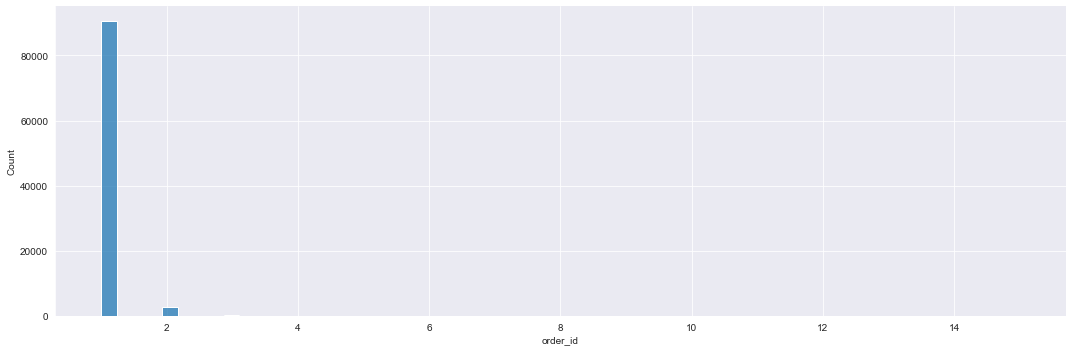

In [103]:
# Observation de la distribution du nombre de commandes par clients

sns.displot(x = 'order_id', data = customers_group, aspect = 3, bins = 60)

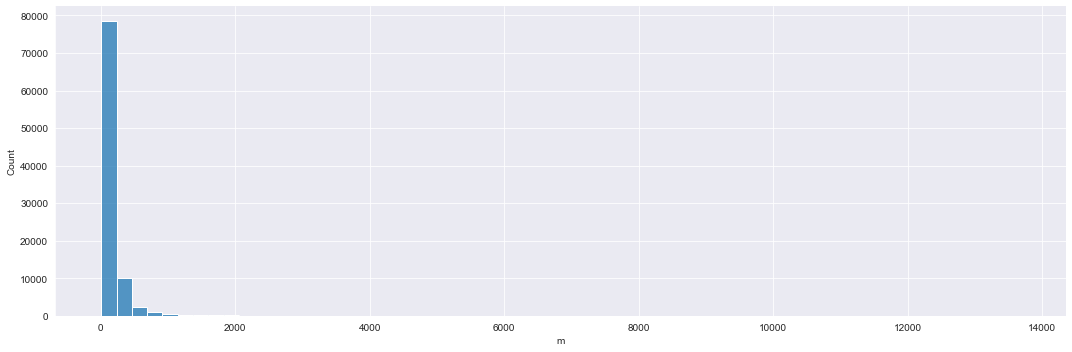

In [104]:
# Observation de la distribution des montants

sns.displot(x = 'm', data = customers_group, aspect = 3, bins = 60)

In [105]:
customers_group['review_score'] = customers_group['review_score'].fillna(customers_group['review_score'].mean())
customers_group['haversine_distance'] = customers_group['haversine_distance'].fillna(customers_group['haversine_distance'].mean())
customers_group['delta_purchase_delivery'] = customers_group['delta_purchase_delivery'].fillna(customers_group['delta_purchase_delivery'].mean())

In [106]:
customers_group['moy_photos_qty'] = customers_group['moy_photos_qty'].fillna(customers_group['moy_photos_qty'].mean())

In [107]:
customers_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93358 non-null  int64         
 1   item_number                    93358 non-null  float64       
 2   total_price_cmd                93358 non-null  float64       
 3   total_freight_cmd              93358 non-null  float64       
 4   review_score                   93358 non-null  float64       
 5   haversine_distance             93358 non-null  float64       
 6   moy_photos_qty                 93358 non-null  float64       
 7   number_of_sequential_payments  93357 non-null  float64       
 8   sum_of_installments_payments   93357 non-null  float64       
 9   order_purchase_day             93358 non-null  int64         
 10  order_purchase_month         

In [108]:
customers_group.to_csv("Olist_1.csv")

In [109]:
df1=pd.read_csv("Olist_1.csv")
df1

,customer_unique_id,order_id,item_number,total_price_cmd,total_freight_cmd,review_score,haversine_distance,moy_photos_qty,number_of_sequential_payments,sum_of_installments_payments,...,order_purchase_periodDay,order_purchase_timestamp,order_delivered_customer_date,product_category_name_english,existing_review,m,f,date_time (Today),R (Récence),delta_purchase_delivery
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,129.90,12.00,5.0,68.656337,1.0,1.0,8.0,...,1,2018-05-10 10:56:27,2018-05-16 20:48:37,House,True,141.90,1,2022-11-30 22:29:58.669578,1665,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,18.90,8.29,4.0,13.765174,1.0,1.0,1.0,...,1,2018-05-07 11:11:27,2018-05-10 18:02:42,Health_Beauty,False,27.19,1,2022-11-30 22:29:58.669578,1668,3.0
2,0000f46a3911fa3c0805444483337064,1,1.0,69.00,17.22,3.0,320.987292,3.0,1.0,8.0,...,3,2017-03-10 21:05:03,2017-04-05 14:38:47,Other,False,86.22,1,2022-11-30 22:29:58.669578,2091,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1.0,25.99,17.63,4.0,1540.727062,5.0,1.0,4.0,...,3,2017-10-12 20:29:41,2017-11-01 21:23:05,Technologies,True,43.62,1,2022-11-30 22:29:58.669578,1875,20.0
4,0004aac84e0df4da2b147fca70cf8255,1,1.0,180.00,16.89,5.0,95.939915,3.0,1.0,6.0,...,3,2017-11-14 19:45:42,2017-11-27 23:08:56,Technologies,False,196.89,1,2022-11-30 22:29:58.669578,1842,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,1570.00,497.42,5.0,1239.685635,1.0,1.0,10.0,...,3,2017-06-08 21:00:36,2017-07-06 09:22:00,Health_Beauty,False,2067.42,1,2022-11-30 22:29:58.669578,2001,27.0
93354,fffea47cd6d3cc0a88bd621562a9d061,1,1.0,64.89,19.69,4.0,948.298541,2.0,1.0,1.0,...,3,2017-12-10 20:07:56,2018-01-09 22:28:20,Kids,False,84.58,1,2022-11-30 22:29:58.669578,1816,30.0
93355,ffff371b4d645b6ecea244b27531430a,1,1.0,89.90,22.56,5.0,947.624481,5.0,1.0,1.0,...,2,2017-02-07 15:49:16,2017-02-22 12:45:04,Auto,False,112.46,1,2022-11-30 22:29:58.669578,2122,14.0
93356,ffff5962728ec6157033ef9805bacc48,1,1.0,115.00,18.69,5.0,396.071172,3.0,1.0,5.0,...,2,2018-05-02 15:17:41,2018-05-14 11:54:26,Other,True,133.69,1,2022-11-30 22:29:58.669578,1673,11.0
